In [25]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

In [26]:
# load dataset
df = pd.read_csv("label_ajaib_num.csv")

# pemisahan data training dan data testing
train_data = df[df["label"].notnull()]  # Data training
test_data = df[df["label"].isnull()]    # Data testing

In [27]:
train_data

,_id,at,data_clean,label
0,663862c1dd520c9ba22efdc2,2024-05-05T12:11:55.000Z,verifikasi jelek,-1.0
1,663862c1dd520c9ba22efdc3,2024-05-05T07:32:30.000Z,gagal tanda tangan coba ulang foto ktp foto ktp,-1.0
2,663862c1dd520c9ba22efdc4,2024-05-05T06:58:43.000Z,selesai verifikasi kecewa aplikasi burik,-1.0
4,663862c1dd520c9ba22efdc6,2024-05-04T05:10:50.000Z,aplikasi ganguan sisa jual saham cocok barusan...,-1.0
7,663862c1dd520c9ba22efdc9,2024-05-03T15:17:09.000Z,astaga main aplikasi investasi cocok topup mas...,-1.0
...,...,...,...,...
3066,663862d9dd520c9ba22f0a60,2022-04-16T20:05:30.000Z,ajaib mahasiswa investasi recomend gampang pah...,1.0
3067,663862d9dd520c9ba22f0a61,2023-01-31T18:48:57.000Z,salah aplikasi investasi bagus mula tampilanya...,1.0
3068,663862d9dd520c9ba22f0a62,2020-10-03T16:38:30.000Z,aplikasi sederhana mudah recomended mula info ...,1.0
3264,663862dcdd520c9ba22f0b33,2023-11-23T14:48:36.000Z,candle stik bagus versi,1.0


In [28]:
test_data

,_id,at,data_clean,label
3,663862c1dd520c9ba22efdc5,2024-05-04T16:24:09.000Z,cocok jual saham,NaN
5,663862c1dd520c9ba22efdc7,2024-05-03T23:03:50.000Z,tolong baik saham hilang kembali dana,NaN
6,663862c1dd520c9ba22efdc8,2024-05-03T15:55:27.000Z,ruang email adu jam kerja konfirmasi deposit r...,NaN
8,663862c1dd520c9ba22efdca,2024-05-03T15:14:10.000Z,males mengunakan aplikasi buka login lelah,NaN
10,663862c1dd520c9ba22efdcd,2024-05-01T14:43:10.000Z,lengkap data ambil foto ktp pencet tanda centa...,NaN
...,...,...,...,...
8627,663a4aee22061f845eb78b6c,2021-12-02T17:27:44.000Z,maf tarik dana saldo rdn cba kali salah,NaN
8628,663a4aee22061f845eb78b6d,2021-12-02T16:09:06.000Z,bantu nyaman,NaN
8629,663a4aee22061f845eb78b6e,2021-12-02T15:21:33.000Z,eroro kakak,NaN
8630,663a4aee22061f845eb78b70,2021-12-02T14:37:57.000Z,bantu aplikasi ajaibtpi login akun,NaN


In [29]:
# preprocess data training
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data["data_clean"])
y_train = train_data["label"]
print(X_train)

  (0, 2628)	1
  (0, 1028)	1
  (1, 771)	1
  (1, 2383)	1
  (1, 2386)	1
  (1, 461)	1
  (1, 2580)	1
  (1, 757)	2
  (1, 1241)	2
  (2, 2628)	1
  (2, 2188)	1
  (2, 1108)	1
  (2, 123)	1
  (2, 395)	1
  (3, 1108)	1
  (3, 123)	1
  (3, 781)	1
  (3, 2279)	1
  (3, 1045)	1
  (3, 2095)	5
  (3, 463)	1
  (3, 221)	1
  (3, 1331)	1
  (3, 921)	2
  (3, 2065)	1
  :	:
  (996, 744)	1
  (997, 123)	1
  (997, 974)	1
  (997, 2595)	1
  (997, 1537)	1
  (997, 1985)	1
  (997, 1033)	1
  (997, 1947)	1
  (997, 1540)	1
  (997, 360)	1
  (997, 2169)	1
  (997, 941)	1
  (998, 178)	1
  (998, 2629)	1
  (998, 421)	1
  (998, 2324)	1
  (999, 2383)	1
  (999, 2386)	1
  (999, 123)	1
  (999, 178)	1
  (999, 701)	1
  (999, 1017)	1
  (999, 1282)	1
  (999, 1938)	1
  (999, 375)	1


In [30]:
# melatih model Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [31]:
# preprocess data testing
X_test = vectorizer.transform(test_data["data_clean"])

In [32]:
# prediksi label untuk data testing
predicted_labels = model.predict(X_test)
print(predicted_labels)

[ 1. -1. -1. ... -1. -1.  1.]


In [33]:
# menetapkan label yang diprediksi ke data testing
test_data["label"] = predicted_labels

C:\Users\miase\AppData\Local\Temp\ipykernel_13016\3043666143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["label"] = predicted_labels


In [34]:
# perhitungan akurasi
y_true = df[df["label"].notnull()]["label"]
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.97


In [35]:
# report klasifikasi
classification_report = classification_report(y_true, y_pred)
print("Classification Report:")
print(classification_report)

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.96      0.99      0.97       500
         1.0       0.99      0.95      0.97       500

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



In [36]:
# simpan ke file excel baru
test_data.to_excel("hasiltesting.xlsx", index=False)

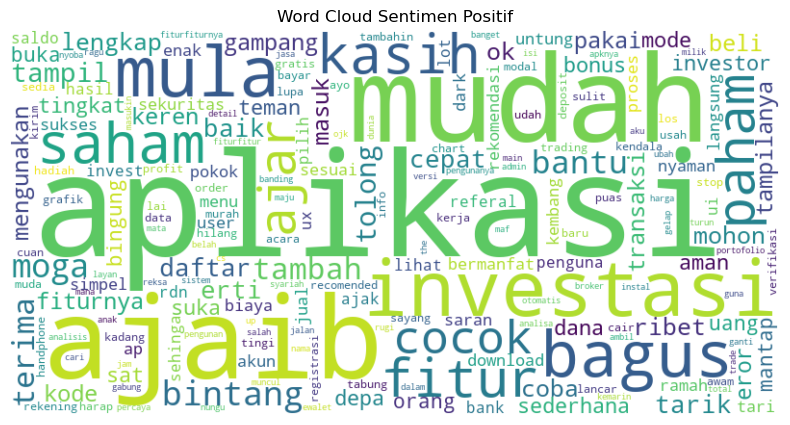

In [39]:
# Load the data for word cloud
wordcloud_data = pd.read_excel("hasiltesting.xlsx")

# Filter the data for label with value "1"
label_data = wordcloud_data[wordcloud_data['label'] == 1]

# Combine the labels into a single string
labels_text = ' '.join(label_data['data_clean'])

# Split the text into individual words
words = labels_text.split()

# Count the occurrences of each word
word_counts = Counter(words)

# Generate the word cloud with unique words
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Sentimen Positif')
plt.show()

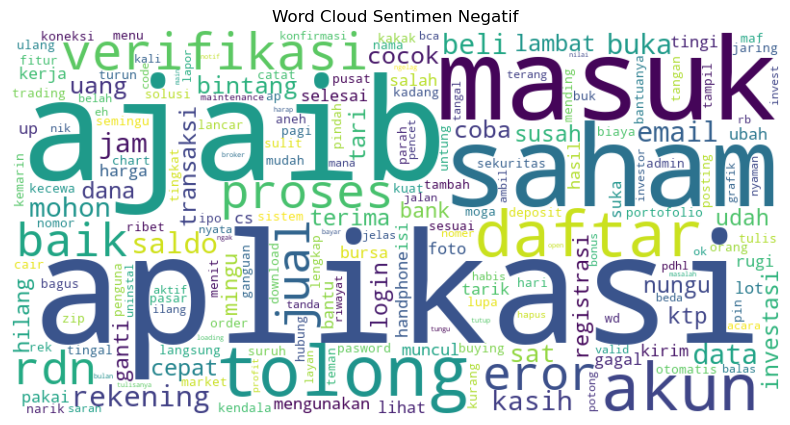

In [40]:
# Load the data for word cloud
wordcloud_data = pd.read_excel("hasiltesting.xlsx")

# Filter the data for label with value "1"
label_data = wordcloud_data[wordcloud_data['label'] == -1]

# Combine the labels into a single string
labels_text = ' '.join(label_data['data_clean'])

# Split the text into individual words
words = labels_text.split()

# Count the occurrences of each word
word_counts = Counter(words)

# Generate the word cloud with unique words
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Sentimen Negatif')
plt.show()

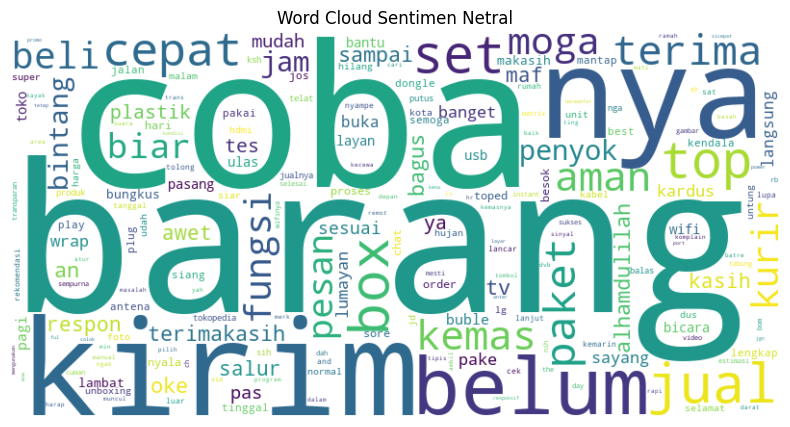

In [12]:
# Load the data for word cloud
wordcloud_data = pd.read_excel("hasiltesting.xlsx")

# Filter the data for label with value "1"
label_data = wordcloud_data[wordcloud_data['label'] == 0]

# Combine the labels into a single string
labels_text = ' '.join(label_data['data_clean'])

# Split the text into individual words
words = labels_text.split()

# Count the occurrences of each word
word_counts = Counter(words)

# Generate the word cloud with unique words
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Sentimen Netral')
plt.show()

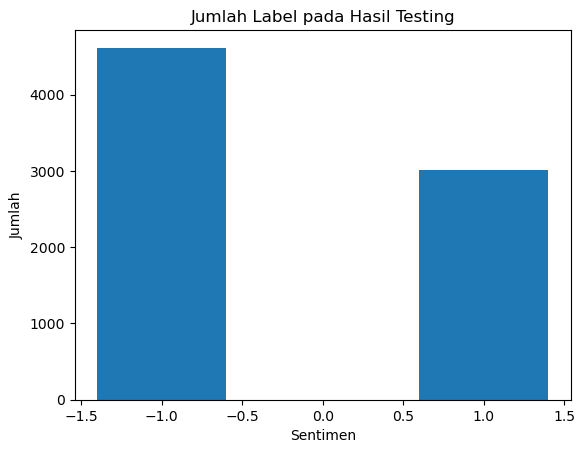

   Sentimen  Jumlah
0        -1    4617
1         1    3015


In [41]:
# Load the modified testing data
modified_data = pd.read_excel("hasiltesting.xlsx")

# Count the occurrences of each label
label_counts = modified_data["label"].value_counts()

# Extract the label values and their corresponding counts
labels = label_counts.index.tolist()
counts = label_counts.values.tolist()

# Map the label values to their corresponding sentiment
# sentiment_map = {1: "Positif", 0: "Netral", -1: "Negatif"}
# labels = [sentiment_map[label] for label in labels]

# Plot the bar chart
plt.bar(labels, counts)
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")
plt.title("Jumlah Label pada Hasil Testing")
plt.show()

chart_data = pd.DataFrame({"Sentimen": labels, "Jumlah": counts})
print(chart_data)

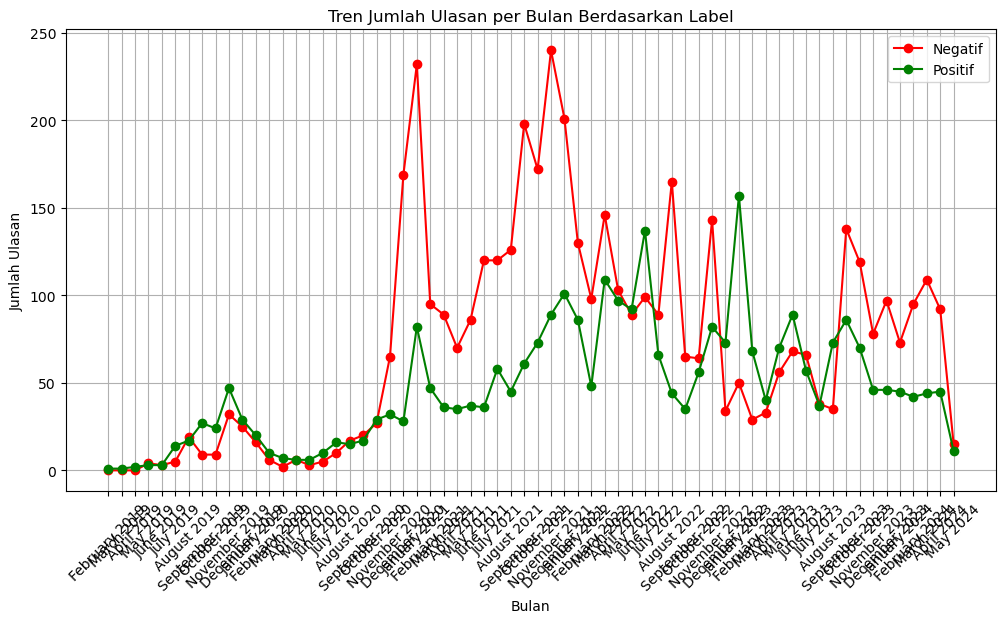

In [43]:
# Memuat data dari Excel file
df = pd.read_excel("hasiltesting.xlsx")

# Mengubah kolom "review_date" menjadi tipe data datetime
df['at'] = pd.to_datetime(df['at'])

# Mengatur kolom "review_date" sebagai indeks dataframe
df.set_index('at', inplace=True)

# Mengganti nilai label menjadi "Positif", "Netral", dan "Negatif"
label_mapping = {1: 'Positif', -1: 'Negatif'}
df['label'] = df['label'].map(label_mapping)

# Menghitung jumlah ulasan per bulan berdasarkan label
monthly_reviews = df.groupby([pd.Grouper(freq='M'), 'label']).size().unstack().fillna(0)

# Membuat line chart untuk tren jumlah ulasan per bulan berdasarkan label
plt.figure(figsize=(12, 6))
labels = ['Negatif', 'Positif']
colors = ['red',  'green']
x_values = range(len(monthly_reviews.index)) 
for i, (label, color) in enumerate(zip(labels, colors)):  # Menambahkan variabel i
    plt.plot(x_values, monthly_reviews[label], marker='o', label=label, color=color)  # Menggunakan x_values

plt.title('Tren Jumlah Ulasan per Bulan Berdasarkan Label')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Ulasan')

# Mengatur sumbu x dengan rentang bulan dan tahun yang sesuai
plt.xticks(x_values, [d.strftime('%B %Y') for d in monthly_reviews.index], rotation=45)  # Menggunakan x_values dan monthly_reviews.index

plt.legend()
plt.grid(True)
plt.show()